In [ ]:
%%shell
# make a gene start table
cat gene_dictionary.json| jq -r '[ .gene_id, .start, .chr] | @tsv' > gene_starts.tsv

# get the targets in this folder


## Decide on the thresholds for pCHIC/Javierre 2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pchic = pd.read_table('full.tsv')
pchic.head()

/usr/local/Cellar/ipython/6.5.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chrom,start,end,ensembl_id,score,cell_type
0,1,831896,848168,ENSG00000187634,30.439420,Erythroblasts
1,1,831896,848168,ENSG00000268179,30.439420,Erythroblasts
2,1,848170,850618,ENSG00000162571,5.113846,Erythroblasts
3,1,848170,850618,ENSG00000131584,5.237197,Erythroblasts
4,1,848170,850618,ENSG00000169972,5.237197,Erythroblasts


In [3]:
genes = pd.read_table('gene_starts.tsv',names=['ensembl_id','tss','chr'])
genes.head()

,ensembl_id,tss,chr
0,ENSG00000223972,11869,1
1,ENSG00000227232,14363,1
2,ENSG00000243485,29554,1
3,ENSG00000237613,34554,1
4,ENSG00000268020,52473,1


In [4]:
df = pd.merge(pchic, genes, on='ensembl_id')
print(df.shape)
df = df[df['chrom'] == df['chr']]
print(df.shape)
df.head()

(3156033, 8)
(1963994, 8)


,chrom,start,end,ensembl_id,score,cell_type,tss,chr
11,1,831896,848168,ENSG00000187634,13.483215,Foetal_thymus,860260,1
12,1,1126527,1150969,ENSG00000187634,6.997477,Foetal_thymus,860260,1
13,1,831896,848168,ENSG00000187634,23.155242,Macrophages_M0,860260,1
14,1,1126527,1150969,ENSG00000187634,12.273935,Macrophages_M0,860260,1
15,1,1212440,1220554,ENSG00000187634,6.047179,Macrophages_M0,860260,1


In [5]:
df['delta'] = abs(df.tss - (df.start + df.end)/2)
df.head()

,chrom,start,end,ensembl_id,score,cell_type,tss,chr,delta
11,1,831896,848168,ENSG00000187634,13.483215,Foetal_thymus,860260,1,20228.0
12,1,1126527,1150969,ENSG00000187634,6.997477,Foetal_thymus,860260,1,278488.0
13,1,831896,848168,ENSG00000187634,23.155242,Macrophages_M0,860260,1,20228.0
14,1,1126527,1150969,ENSG00000187634,12.273935,Macrophages_M0,860260,1,278488.0
15,1,1212440,1220554,ENSG00000187634,6.047179,Macrophages_M0,860260,1,356237.0


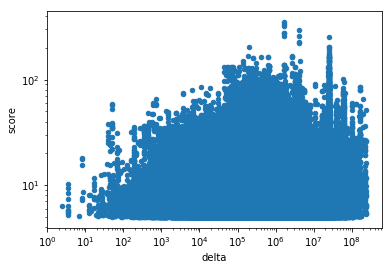

In [40]:
df.plot.scatter("delta","score",loglog=True)

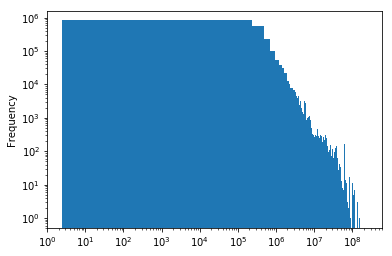

In [9]:
df['delta'].plot(kind='hist',loglog=True,bins=1000)

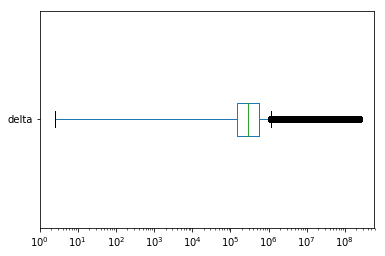

In [25]:
df['delta'].plot(kind='box',logx=True, vert=False)

In [26]:
df['delta'].describe()

count    1.963994e+06
mean     9.916684e+05
std      4.955982e+06
min      2.500000e+00
25%      1.470405e+05
50%      2.895870e+05
75%      5.596670e+05
max      2.374542e+08
Name: delta, dtype: float64

In [34]:
df['delta'].quantile([0.68,0.75,0.9,0.95])

0.68     449552.0
0.75     559667.0
0.90    1284893.5
0.95    2451406.0
Name: delta, dtype: float64

In [38]:
print(df.loc[df['delta'] < 2.45e6].shape)

(1865719, 9)


It appears 2.45e6 is a reasonable threshold for this dataset. Real binding interactions ought to sit evenly in a window of up to the size of the accessible region of chromatin - sometimes called a topologically accessible domain (TAD), which is of the order of 100 kb - 1 Mb. This threshold would include them.